# Etude de la détection automatique de caractéristiques sur un signal audio
![ISEN Lille](src/isen.jpg)

# Support de tests

Ce Notebook est une version allégée du **Compte-rendu**.
Elle permet d'effectuer rapidement les tests en chargeant directement tous les fichiers nécessaires.

In [10]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%matplotlib notebook
%run -i bin/imports.py
%run -i bin/plot_specamp.py
%run -i bin/plot_specgram.py
%run -i bin/bandpass.py
%run -i bin/gen_filters.py
%run -i bin/plot_freqz.py
%run -i bin/gen_filtered.py
%run -i bin/plot_filtered.py
%run -i bin/energy.py
%run -i bin/energies.py
%run -i bin/plot_energies.py
%run -i bin/gen_data.py
%run -i bin/plot_datagram.py
%run -i bin/plot_data.py
%run -i bin/state_at.py
%run -i bin/compute.py
%run -i bin/compare.py
%run -i bin/live_record.py

In [9]:
%%html
<script>
IPython.OutputArea.prototype._should_scroll = lines => { return false }  
</script>
<style>
.output_wrapper button.btn.btn-default, .output_wrapper .ui-dialog-titlebar { display: none; }
.ui-resizable { pointer-events:none; }
</style>

# Zone de tests

Toutes les fonctions implémentées sont accessibles dans les cellules ci-dessous.

C:\ProgramUser\Anaconda\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


<IPython.core.display.Javascript object>


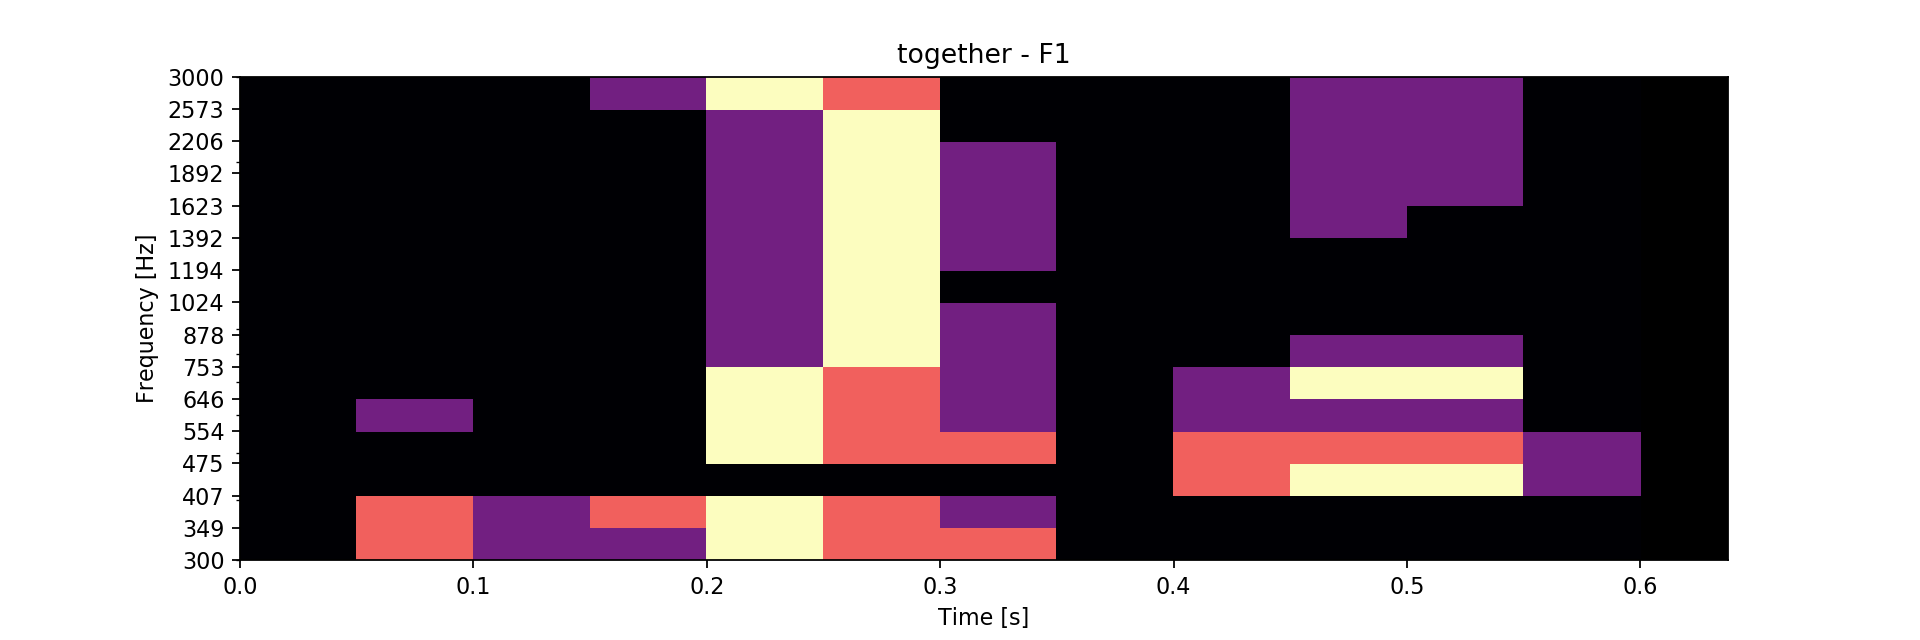

<IPython.core.display.Javascript object>


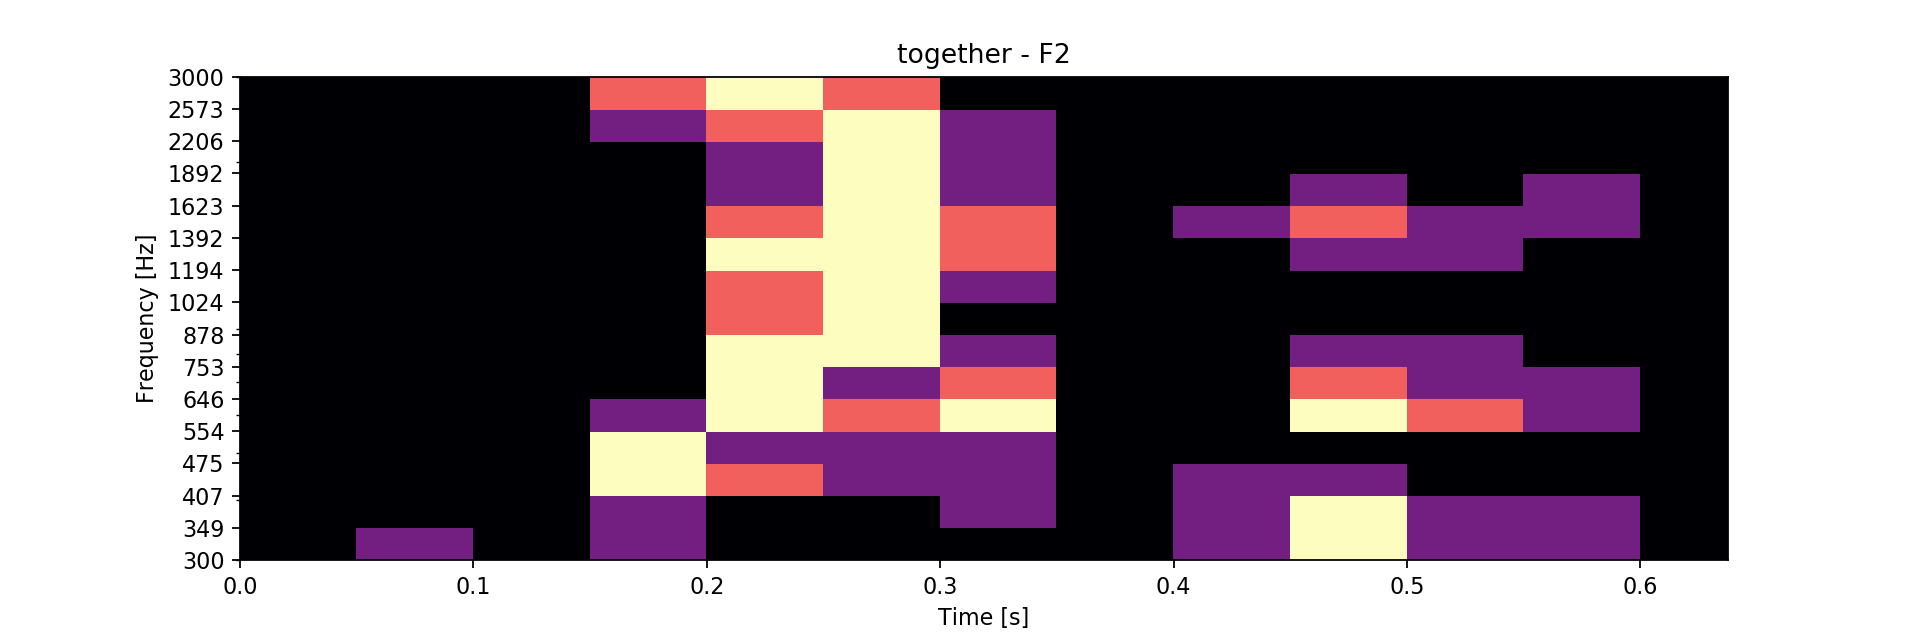

<IPython.core.display.Javascript object>


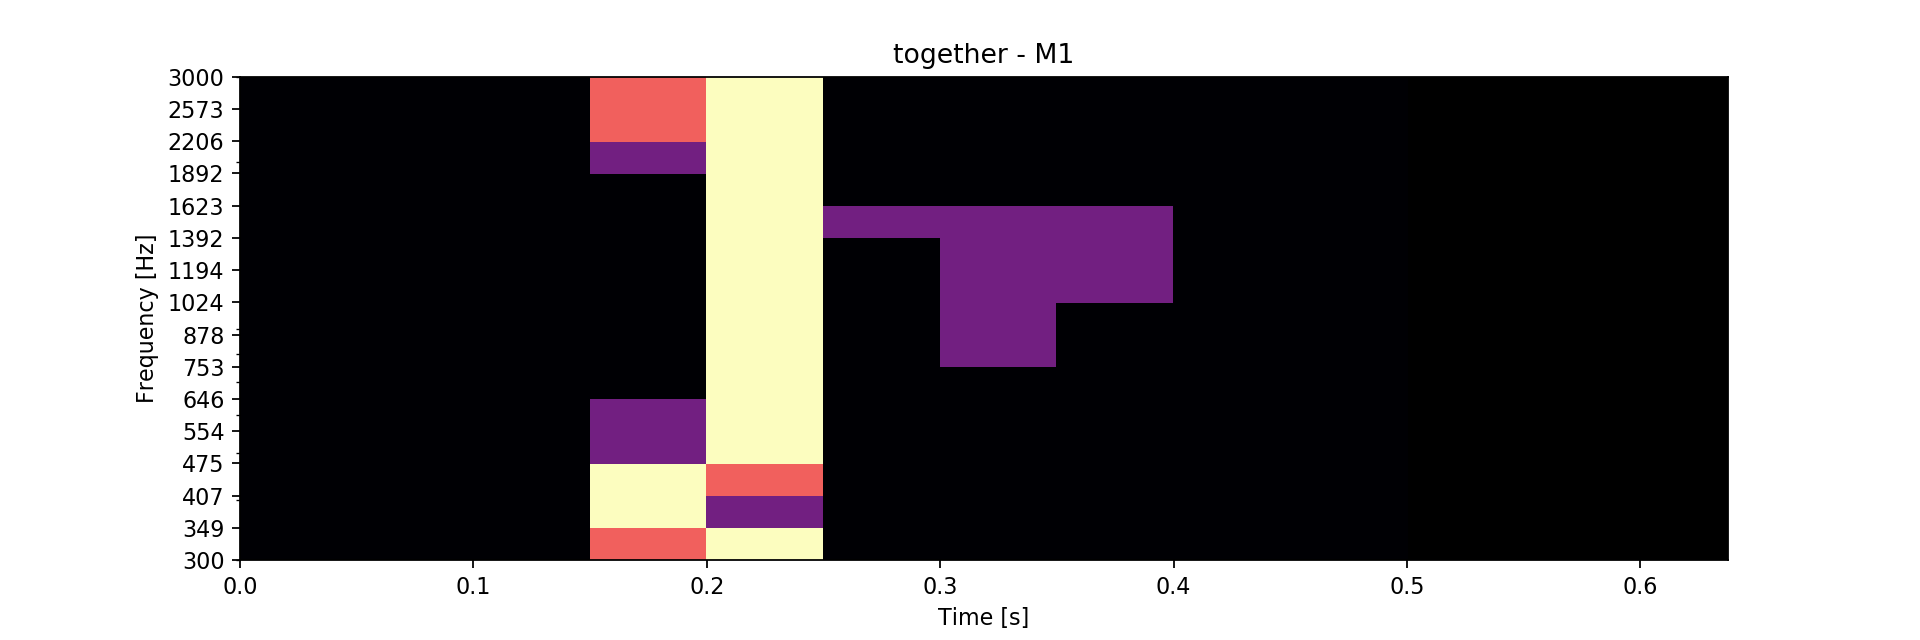

<IPython.core.display.Javascript object>


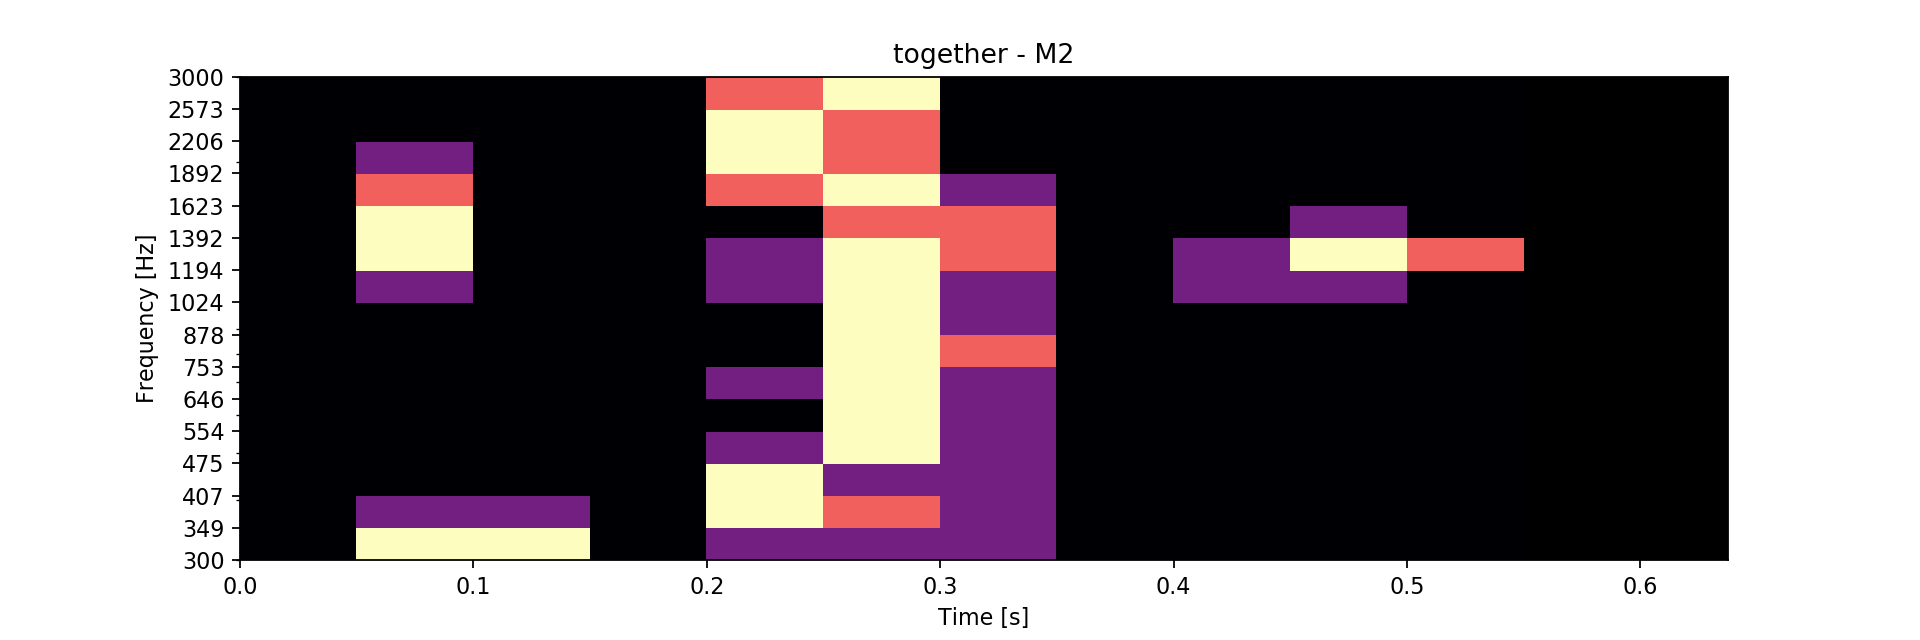

In [6]:
compare(
    compare_format = "src/Words/voice_{person}_{word}_2.wav",
    words=["together"],
    persons=["F1", "F2", "M1", "M2"],
    fmin=300, 
    fmax=3000, 
    nb_filters=16, 
    q=3, 
    n=3, 
    time_res=0.05, 
    amp_res=2
)